In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
data=pd.read_csv('data.csv')
data=data[:137]
data.head()

,time,order,stock
0,12/30/2023,236.233018,300.913178
1,11/30/2023,255.000806,219.128130
2,10/30/2023,214.373572,251.006882
3,9/30/2023,241.332603,275.986500
4,8/30/2023,244.630560,225.871288


In [34]:
data['time']=data['time'].apply(pd.to_datetime)

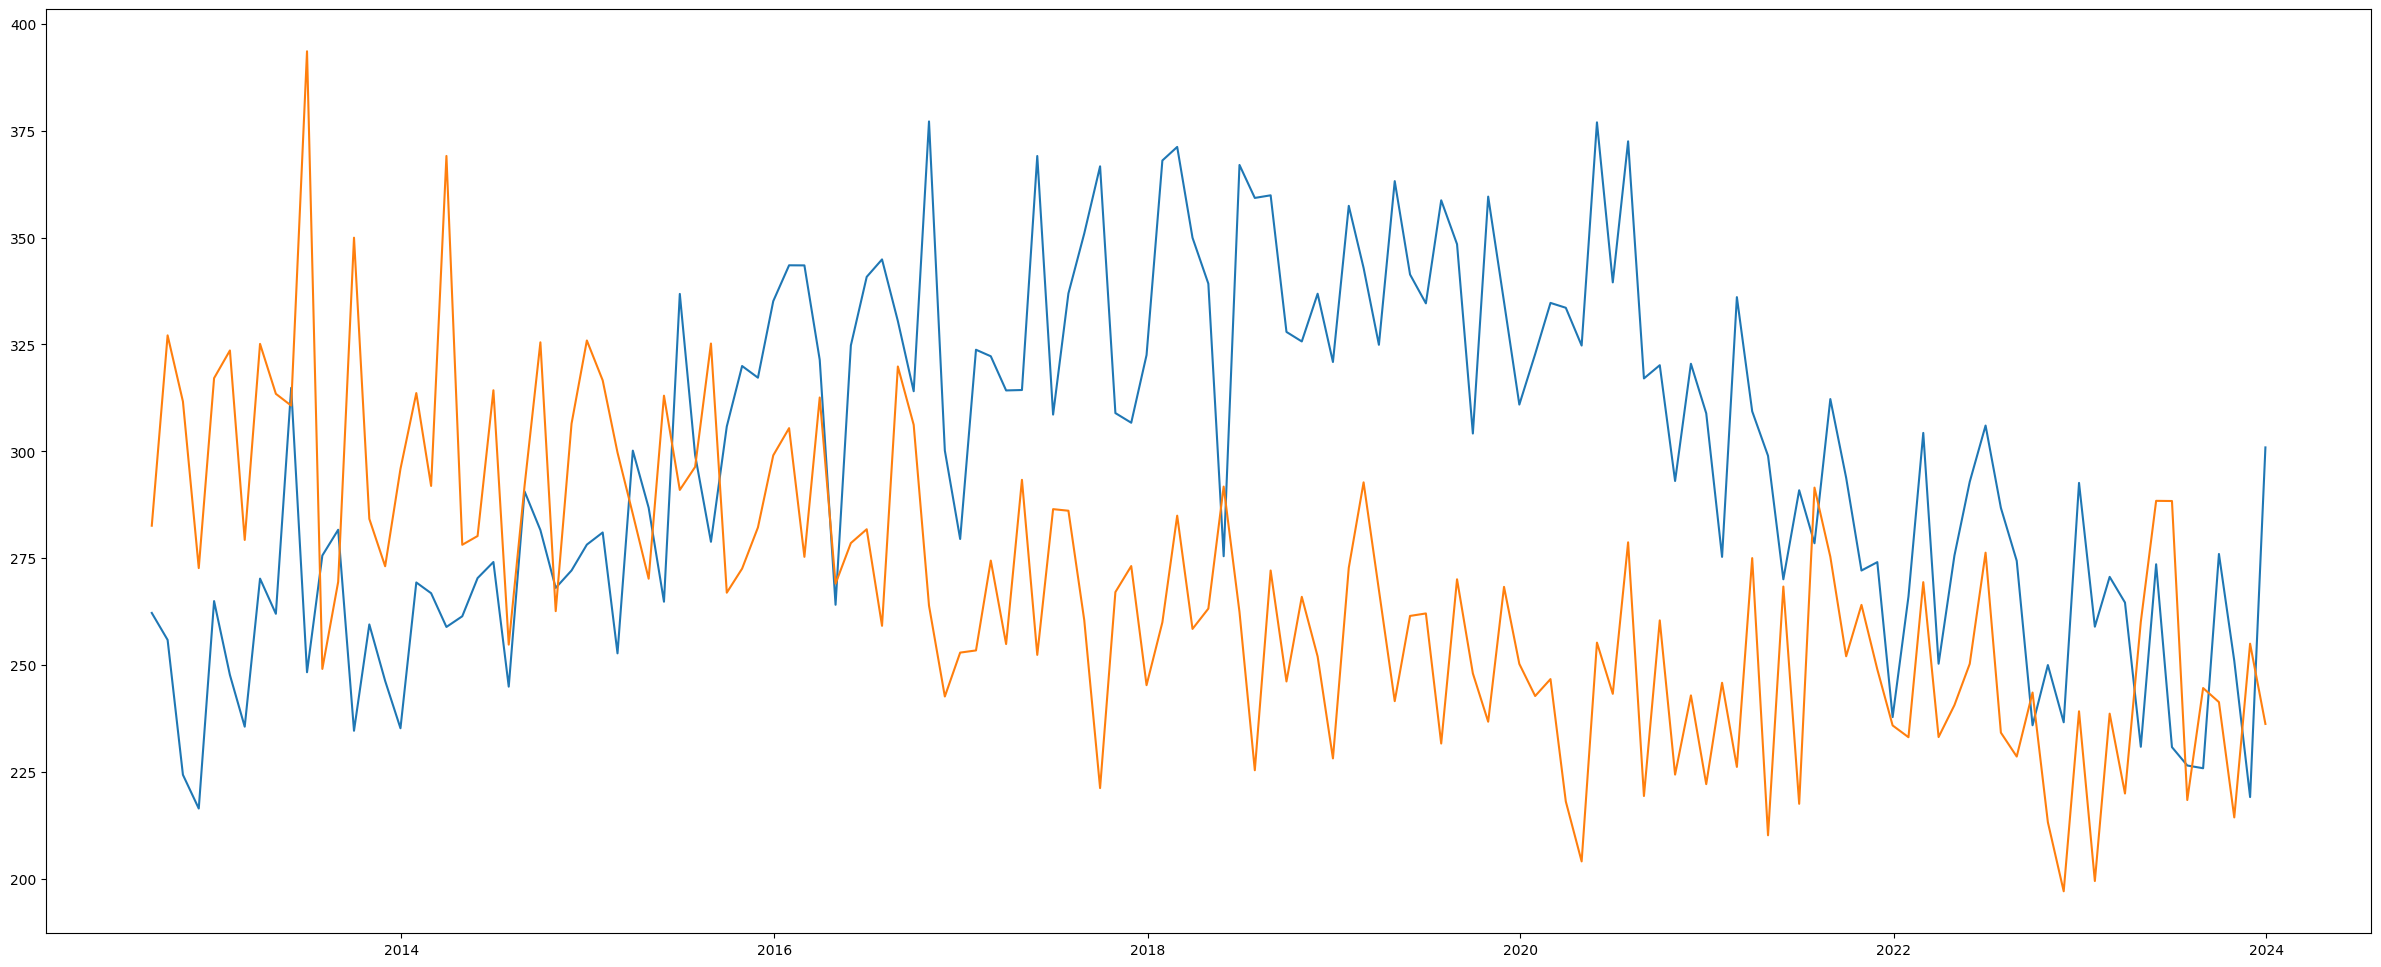

In [37]:
plt.figure(figsize=(30,12))
plt.plot(data['time'],data['stock'])
plt.plot(data['time'],data['order'])
plt.show()

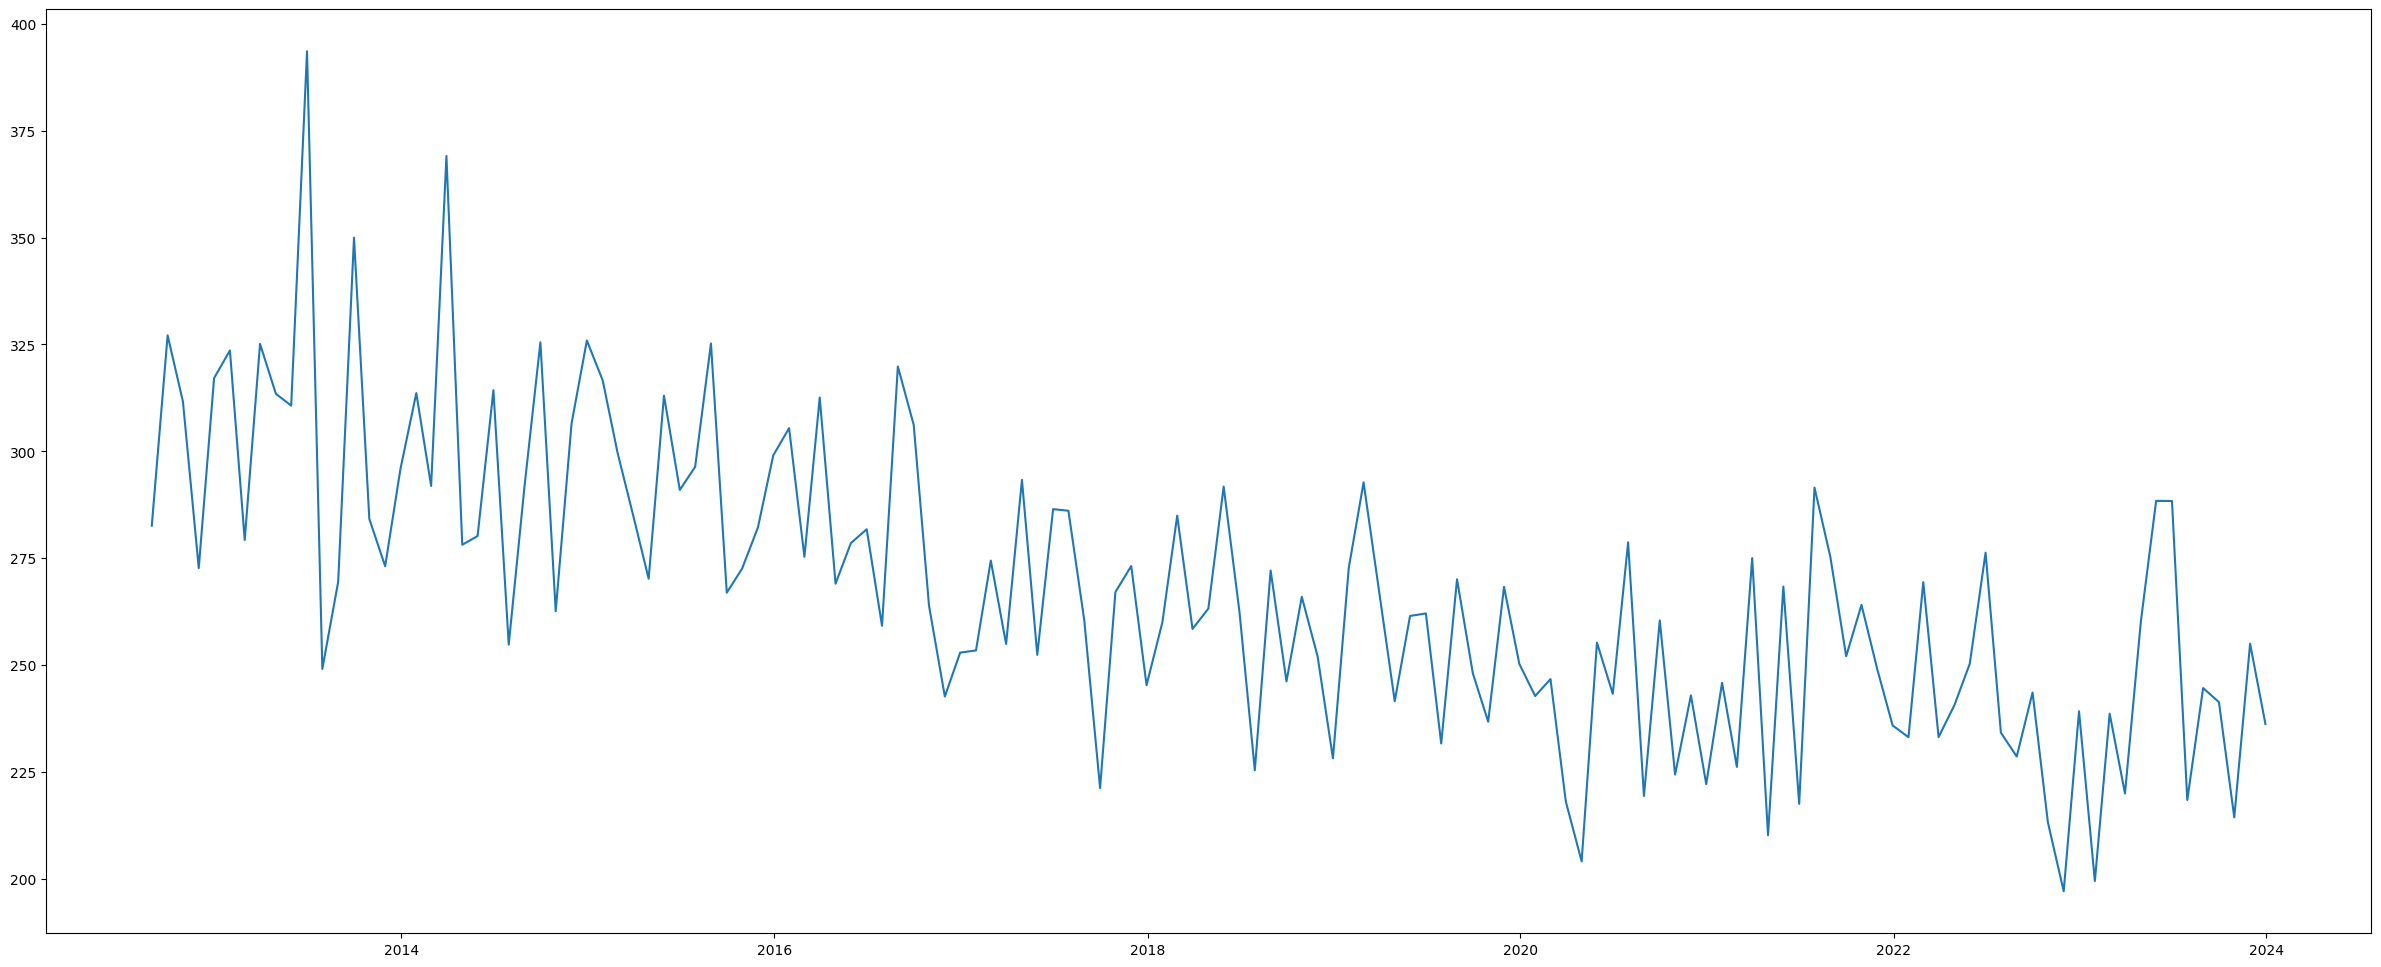

In [38]:
plt.figure(figsize=(30,12))
plt.plot(data['time'],data['order'])
plt.show()

In [39]:
from statsmodels.tsa.stattools import adfuller

In [41]:
adfuller(data['order'])

(-0.040424944902205426,
 0.9550585325709774,
 11,
 125,
 {'1%': -3.4837793736959997, '5%': -2.88495387648, '10%': -2.579256976},
 1146.0206188648426)

In [44]:
data['diff1']=data['order'].diff()

In [52]:
data=data.drop(data.index[0])

In [54]:
adfuller(data['diff1'])#1 level

(-6.495689528364205,
 1.19593040045766e-08,
 10,
 125,
 {'1%': -3.4837793736959997, '5%': -2.88495387648, '10%': -2.579256976},
 1134.3327409301223)

In [55]:
data=pd.read_csv('data.csv')
data=data[:137]
data.head()

,time,order,stock
0,12/30/2023,236.233018,300.913178
1,11/30/2023,255.000806,219.128130
2,10/30/2023,214.373572,251.006882
3,9/30/2023,241.332603,275.986500
4,8/30/2023,244.630560,225.871288


In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [87]:
model=SARIMAX(data['order'], order=(10, 1, 5), seasonal_order=(2, 1, 2, 10))

In [88]:
res=model.fit()

D:\Programs\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Programs\anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [89]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  Statespace Model Results                                 
===========================================================================================
Dep. Variable:                               order   No. Observations:                  137
Model:             SARIMAX(10, 1, 5)x(2, 1, 2, 10)   Log Likelihood                -581.476
Date:                             Wed, 14 Feb 2024   AIC                           1202.951
Time:                                     13:47:01   BIC                           1259.677
Sample:                                          0   HQIC                          1225.997
                                             - 137                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7001      4.333     -0.162      0.872      -9.192       7.792
ar.L2         -0.3668      6.165     -0.060      0.953     -12.449      11.715
ar.L3          0.0837      6.075      0.014      0.989     -11.824      11.991
ar.L4          0.6701      4.139      0.162      0.871      -7.442       8.782
ar.L5          0.0006      0.246      0.002      0.998      -0.482       0.483
ar.L6          0.0243      0.225      0.108      0.914      -0.416       0.464
ar.L7         -0.1200      0.189     -0.636      0.525      -0.490       0.250
ar.L8          0.1208      0.628      0.192      0.847      -1.110       1.352
ar.L9          0.2034      0.232      0.876      0.381      -0.252       0.659
ar.L10        -0.1082      0.774     -0.140      0.889      -1.624       1.408
ma.L1         -0.3822      4.306     -0.089      0.929      -8.822       8.058
ma.L2         -0.2126      1.818     -0.117      0.907      -3.775       3.350
ma.L3         -0.1696      0.731     -0.232      0.817      -1.603       1.263
ma.L4         -0.7178      1.008     -0.712      0.476      -2.693       1.257
ma.L5          0.5886      3.618      0.163      0.871      -6.502       7.679
ar.S.L10      -0.8141      0.950     -0.857      0.391      -2.675       1.047
ar.S.L20       0.0769      0.233      0.330      0.742      -0.380       0.534
ma.S.L10      -0.1362      4.656     -0.029      0.977      -9.263       8.990
ma.S.L20      -0.8512      3.417     -0.249      0.803      -7.548       5.846
sigma2       466.3154   1859.115      0.251      0.802   -3177.483    4110.114
===================================================================================
Ljung-Box (Q):                       27.10   Jarque-Bera (JB):                 1.64
Prob(Q):                              0.94   Prob(JB):                         0.44
Heteroskedasticity (H):               0.99   Skew:                             0.19
Prob(H) (two-sided):                  0.98   Kurtosis:                         2.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
data['fited']=res.fittedvalues

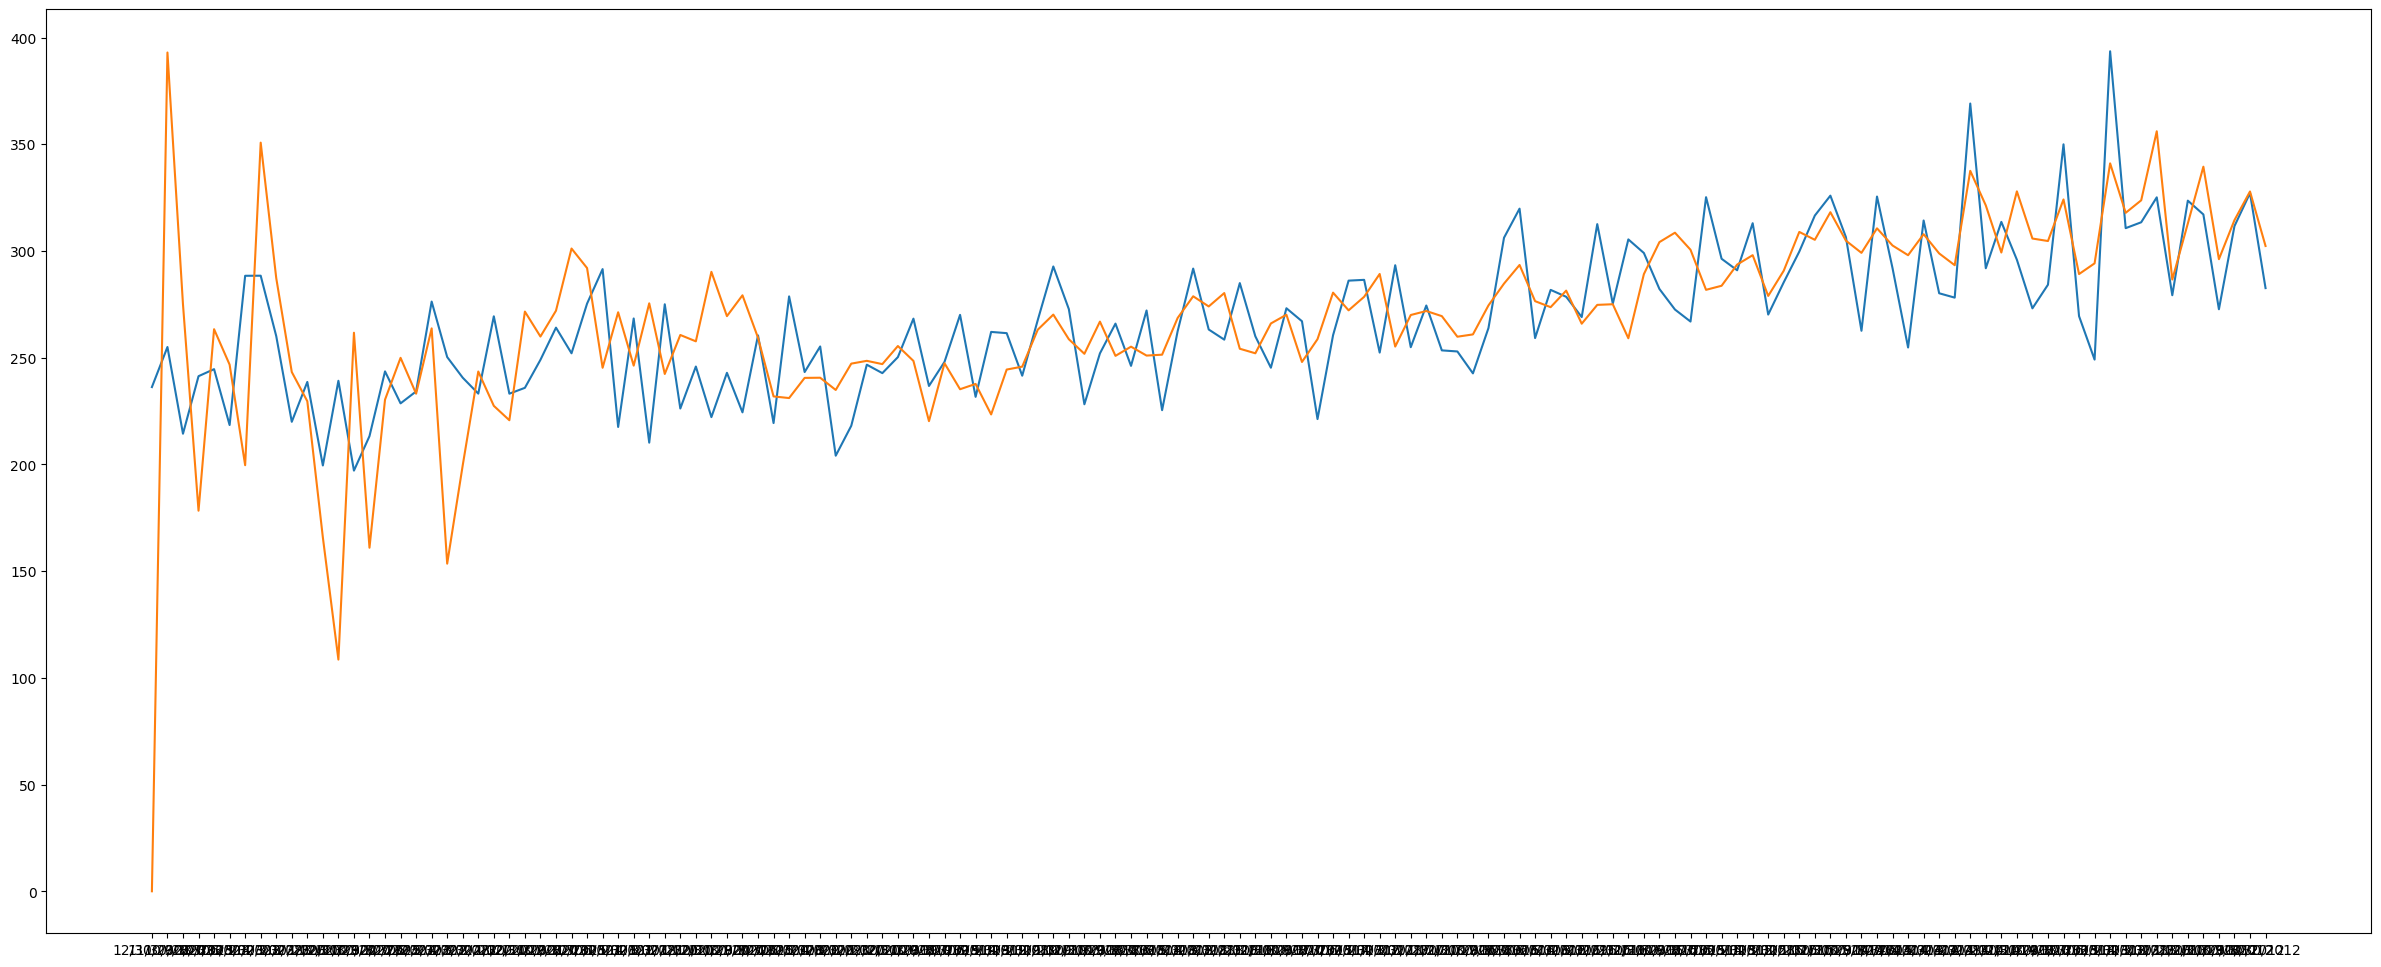

In [86]:
plt.figure(figsize=(30,12))
plt.plot(data['time'],data['order'])
plt.plot(data['time'],data['fited'])
plt.show()

In [106]:
data['fited'][:12] = np.NaN

forecast = res.predict(start=len(data), end=len(data) + 24)

D:\Programs\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [107]:
forecast = data['fited'].append(forecast)

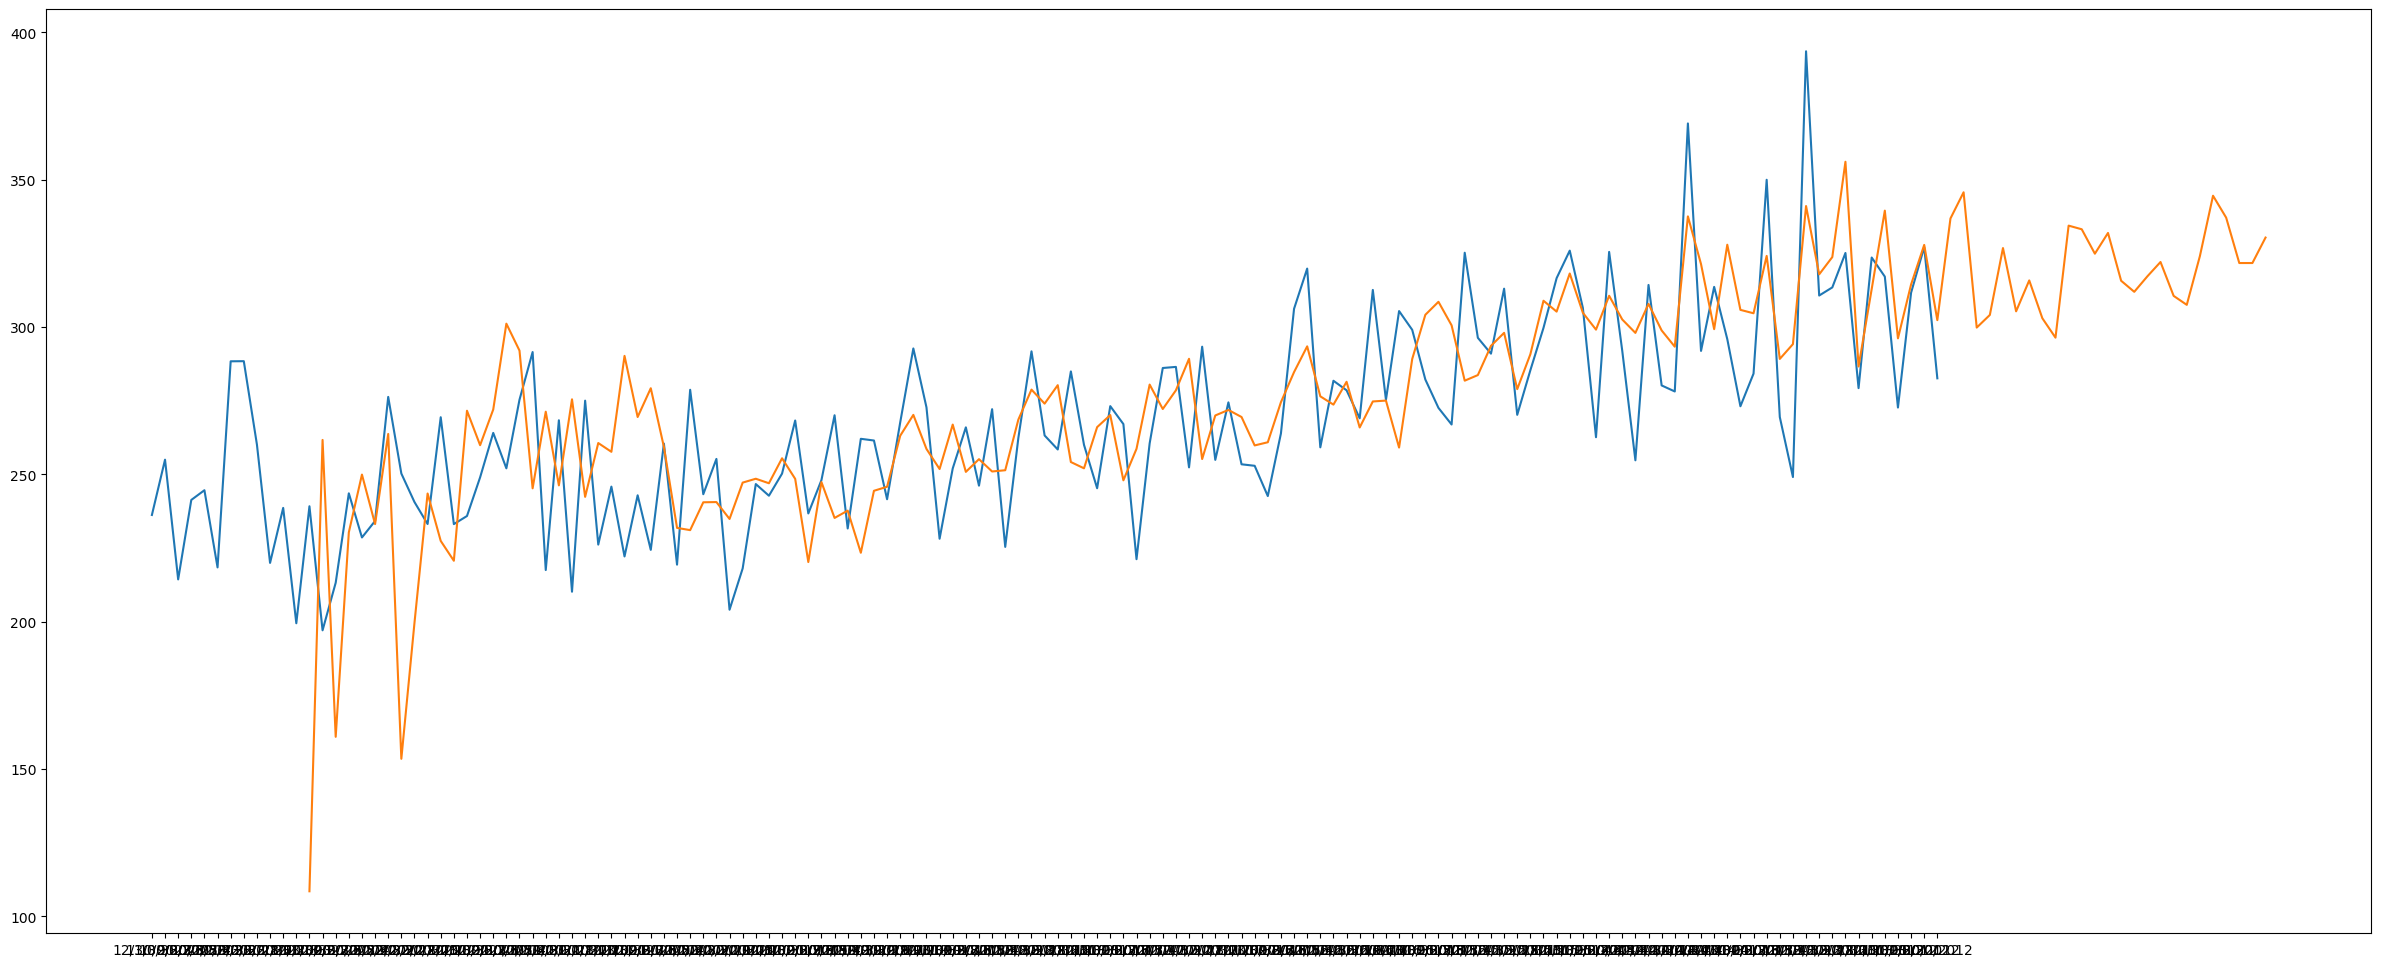

In [108]:
plt.figure(figsize=(30,12))
plt.plot(data['time'],data['order'])
plt.plot(forecast)
plt.show()